In [10]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

import sys, os
root_dir = os.path.abspath("..")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from fci import *

%load_ext autoreload
%autoreload 2

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
bn = gum.loadBN("instances/asia.bif")
bn

(pyagrum.BayesNet@0x13b60fa00) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 18, mem: 288o}

In [12]:
#gum.generateSample(bn, 50_000, "data/asia-skeleton-test.csv", random_order=True)

In [13]:
learner = gum.BNLearner("data/asia-skeleton-test.csv")
learner.useMIIC()
learner.learnPDAG()

(pyagrum.PDAG@0x14b0b5000) {0,1,2,3,4,5,6,7} , {6->1,7->6,0->6,6->4,2->4} , {0--5,2--5,3--7}

In [14]:
graph, sepsets, log = initSkeleton(learner, verbose=True, record=True)

'lung' cond dep 'xray' | () with p-value=0.0 < 0.05
'lung' cond dep 'bronc' | () with p-value=0.0 < 0.05
'lung' cond ind 'asia' | () with p-value=0.05264276366299503 >= 0.05
'lung' cond dep 'dysp' | () with p-value=0.0 < 0.05
'lung' cond dep 'smoke' | () with p-value=0.0 < 0.05
'lung' cond dep 'either' | () with p-value=0.0 < 0.05
'lung' cond ind 'tub' | () with p-value=0.12167671498944677 >= 0.05
'xray' cond dep 'bronc' | () with p-value=0.0 < 0.05
'xray' cond ind 'asia' | () with p-value=0.9888702038936368 >= 0.05
'xray' cond dep 'dysp' | () with p-value=0.0 < 0.05
'xray' cond dep 'smoke' | () with p-value=0.0 < 0.05
'xray' cond dep 'either' | () with p-value=0.0 < 0.05
'xray' cond dep 'tub' | () with p-value=0.0 < 0.05
'bronc' cond ind 'asia' | () with p-value=0.7725580443964737 >= 0.05
'bronc' cond dep 'dysp' | () with p-value=0.0 < 0.05
'bronc' cond dep 'smoke' | () with p-value=0.0 < 0.05
'bronc' cond dep 'either' | () with p-value=0.0 < 0.05
'bronc' cond ind 'tub' | () with p-va

In [15]:
df = pd.DataFrame(log, columns=["x", "y", "Z", "p-value"])
df

,x,y,Z,p-value
0,lung,xray,(),0.000000
1,lung,bronc,(),0.000000
2,lung,asia,(),0.052643
3,lung,dysp,(),0.000000
4,lung,smoke,(),0.000000
...,...,...,...,...
63,dysp,smoke,"(bronc, either)",0.303286
64,either,tub,"(dysp, xray)",0.000000
65,either,tub,"(dysp, lung)",0.000000
66,either,tub,"(xray, lung)",0.000000


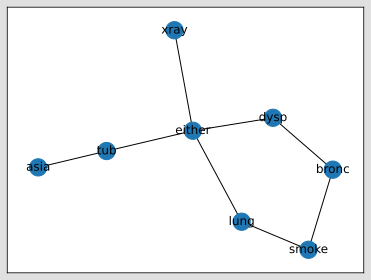

In [17]:
def drawnxGraph(graph: nx.Graph) -> None:
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos)
    nx.draw_networkx_labels(graph, pos)
    #nx.draw_networkx_edge_labels(graph, pos)
    nx.draw_networkx_edges(graph, pos)
    plt.show()

drawnxGraph(graph)

In [18]:
pag = rule0(graph, sepsets, verbose=True)

orientes 'lung' o-o 'either' o-o 'tub' as 'lung' o-> either <-o 'tub'
orientes 'bronc' o-o 'dysp' o-o 'either' as 'bronc' o-> dysp <-o 'either'
orientes 'asia' o-o 'tub' o-> 'either' as 'asia' o-> tub <-> 'either'


In [19]:
df[(df["x"] == "asia") & (df["y"] == "either")]

,x,y,Z,p-value
20,asia,either,(),0.231888
